In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Scanpy config
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0


In [3]:
# Read in the clustered flux analysis data
master_dir = ''
adata = sc.read_h5ad(master_dir + 'data/PBMC/fo8_thru_in8_PRO_for_CD8.h5ad')

In [4]:
celltype = 'cd8'
adata_gex = sc.read_h5ad(master_dir + 'output/' + celltype + '-processed-analyzed.h5ad')
adata_gex_metab = sc.read_h5ad(master_dir + 'output/' + celltype + '-processed-analyzed-metab.h5ad')

In [5]:
sum(adata.obs.index == adata_gex.obs.index)

25966

In [6]:
sum(adata.obs.index == adata_gex_metab.obs.index)

25966

In [7]:
# All the proteins
for name in adata.var_names:
    print(name)

CD80-1
CD86-1
CD274_B7-H1_PD-L1
CD273_B7-DC_PD-L2
CD275_B7-H2_ICOSL
CD11B
CD252_OX40L
CD137L_4-1BB_Ligand
CD155_PVR
CD112_NECTIN-2
CD47-1
CD70-1
CD30
CD40-1
CD154
CD52-1
CD3
CD8
CD56_NCAM
CD19-1
CD33-1
CD11C
CD34-1
CD269_BCMA
HLA-A-B-C
CD90_Thy1
CD117_c-Kit
CD10
CD45RA
CD123
CD7-1
CD49F
CD194_CCR4
CD4-1
CD44-1
CD14-1
CD16
CD25
CD45RO
CD279_PD-1
TIGIT_VSTM3
Mouse_IgG1_Isotype-Control
Mouse_IgG2a_Isotype-Control
Mouse_IgG2b_Isotype-Control
Rat_IgG2b_Isotype-Control
CD20
CD335_NKp46
CD294_CRTH2
CD326_Ep-CAM
CD31
Podoplanin
CD146
CD324_E-Cadherin
IgM
CD5-1
TCR-G-D
CD183_CXCR3
CD195_CCR5
CD32
CD196_CCR6
CD185_CXCR5
CD103_Integrin-AE
CD69-1
CD62L
CD197_CCR7
CD161
CD152_CTLA-4
CD223_LAG-3
KLRG1_MAFA
CD27-1
CD107A_LAMP-1
CD95-FAS
HLA-DR
CD1C-1
CD64
CD141_Thrombomodulin
CD1D-1
CD314_NKG2D
CD66B
CD35
CD57_Recombinant
CD366_Tim-3
CD272_BTLA
CD278_ICOS
CD58_LFA-3
CD96_TACTILE
CD39
CD178_FAS-L
CX3CR1-1
CD24-1
CD21
CD11A
IgA
CD79_IgB
CD66A-C-E
CD244_2B4
CD235AB
CD206_MMR
CD169_Sialoadhesin_Siglec-1


In [8]:
# Bring protein markers to adata_gex and adata_gex_metab
markers = ['CD45RA', 'CD45RO', 'CD197_CCR7', 'CD62L', 'CD95-FAS', 'CD57_Recombinant', 'CD279_PD-1']
for marker in markers:
    adata_gex.obs[marker] = adata[:, marker].X.todense()
    adata_gex_metab.obs[marker] = adata[:, marker].X.todense()

In [9]:
(adata_gex.obs['CD45RA'] / adata_gex.obs['CD45RO']).describe()

count    2.574600e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.000000e+00
50%      1.145890e+00
75%      1.314382e+00
max               inf
dtype: float64

In [10]:
adata_gex.obs['CD45RA/CD45RO'] = (adata_gex.obs['CD45RA']) / (adata_gex.obs['CD45RO'])
adata_gex_metab.obs['CD45RA/CD45RO'] = adata_gex.obs['CD45RA/CD45RO'].copy()

In [11]:
adata_gex.obs['louvain_metab'] = adata_gex_metab.obs['louvain']
adata_gex_metab.obs['louvain_all'] = adata_gex.obs['louvain']

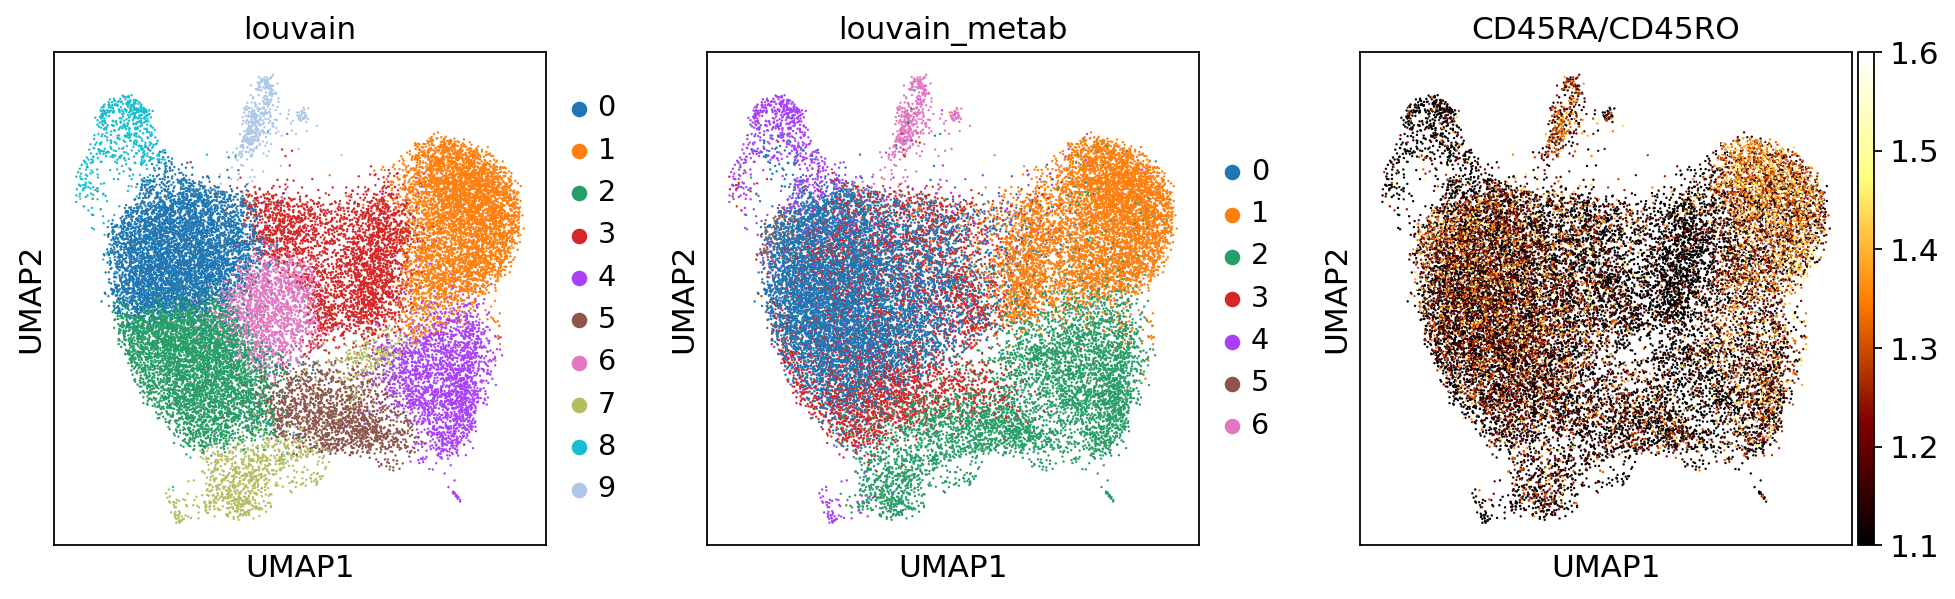

In [17]:
sc.pl.umap(adata_gex, color=['louvain', 'louvain_metab', #'CD45RA', 'CD45RO', 'CD197_CCR7', 'CD62L', 'CD95-FAS',
                             'CD45RA/CD45RO'], cmap='afmhot', vmin=1.1, vmax=1.6)

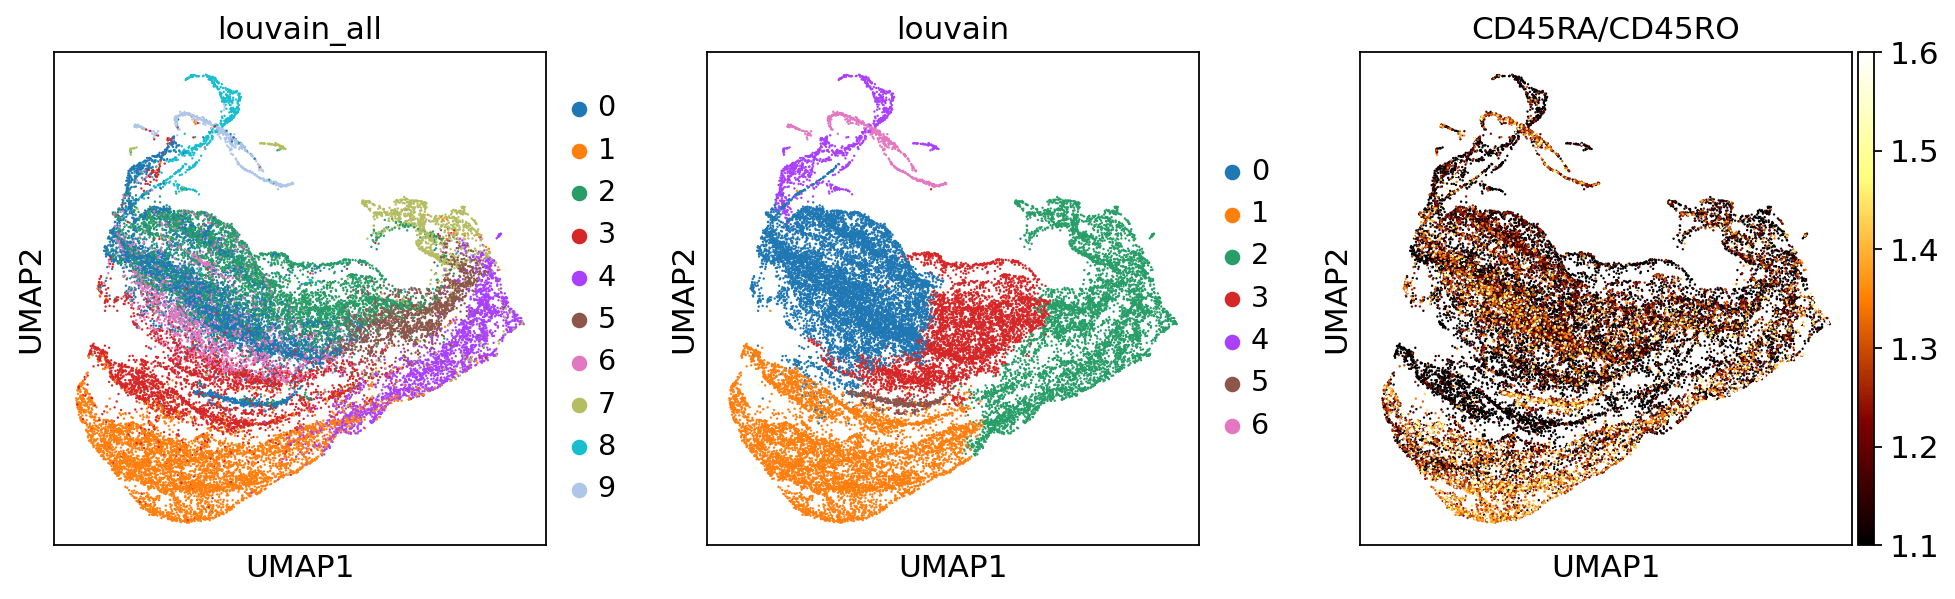

In [18]:
sc.pl.umap(adata_gex_metab, color=['louvain_all', 'louvain', #'CD45RA', 'CD45RO', 'CD197_CCR7', 'CD62L', 'CD95-FAS',
                             'CD45RA/CD45RO'], cmap='afmhot', vmin=1.1, vmax=1.6)

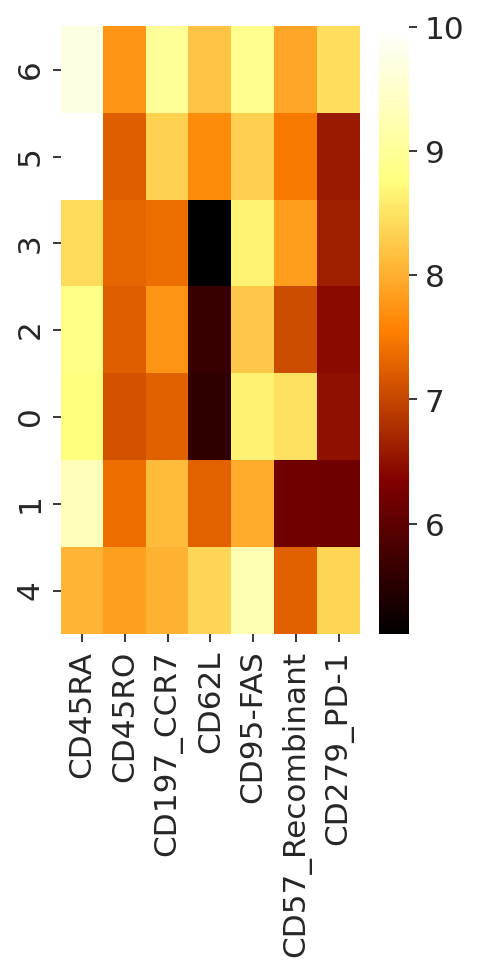

In [38]:
df = pd.DataFrame(columns=adata_gex.obs['louvain_metab'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers, index=markers), df, left_index=True, right_index=True)
df = df.drop(columns=0)
# Reproduce ordering of clusters from metabolic gene clustermap
df = df.loc[:, ['6', '5', '3', '2', '0', '1', '4']]
#sns.clustermap(df.transpose(), col_cluster=False, cmap='plasma', figsize=(3, 5))
fig = plt.figure(figsize=(3, 5))
fig = sns.heatmap(df.transpose(), cmap='afmhot')

In [39]:
df

,6,5,3,2,0,1,4
CD45RA,9.717214,10.002548,8.433260,8.820481,8.762199,9.322036,8.067522
CD45RO,7.749722,7.245198,7.322492,7.238854,7.123239,7.384694,7.848440
CD197_CCR7,8.994032,8.335261,7.369728,7.732526,7.265979,8.111589,8.020142
CD62L,8.217790,7.665006,5.108948,5.626453,5.573443,7.282682,8.377780
CD95-FAS,8.925205,8.302282,8.650313,8.255276,8.643662,7.964256,9.256200
CD57_Recombinant,7.927433,7.486454,7.839935,7.070954,8.473810,6.182952,7.256967
CD279_PD-1,8.451255,6.584388,6.629258,6.445530,6.496869,6.172709,8.366634


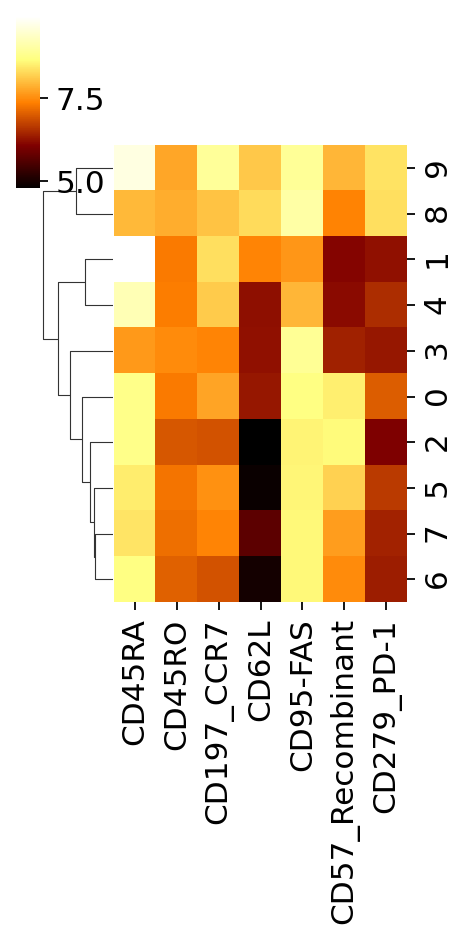

In [20]:
df = pd.DataFrame(columns=adata_gex.obs['louvain'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['louvain']==col].obs.loc[:, markers], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers, index=markers), df, left_index=True, right_index=True)
df = df.drop(columns=0)
sns.clustermap(df.transpose(), col_cluster=False, cmap='afmhot', figsize=(3, 6))
#sns.heatmap(df)

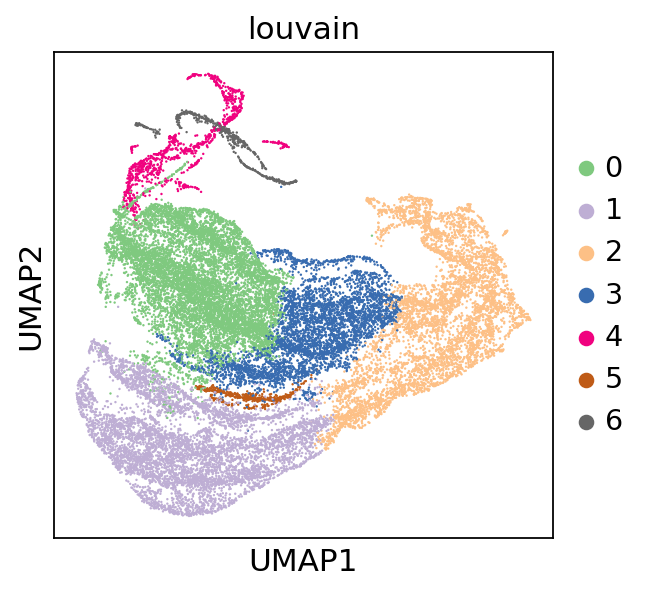

In [12]:
sc.pl.umap(adata_gex_metab, color='louvain', palette='Accent')

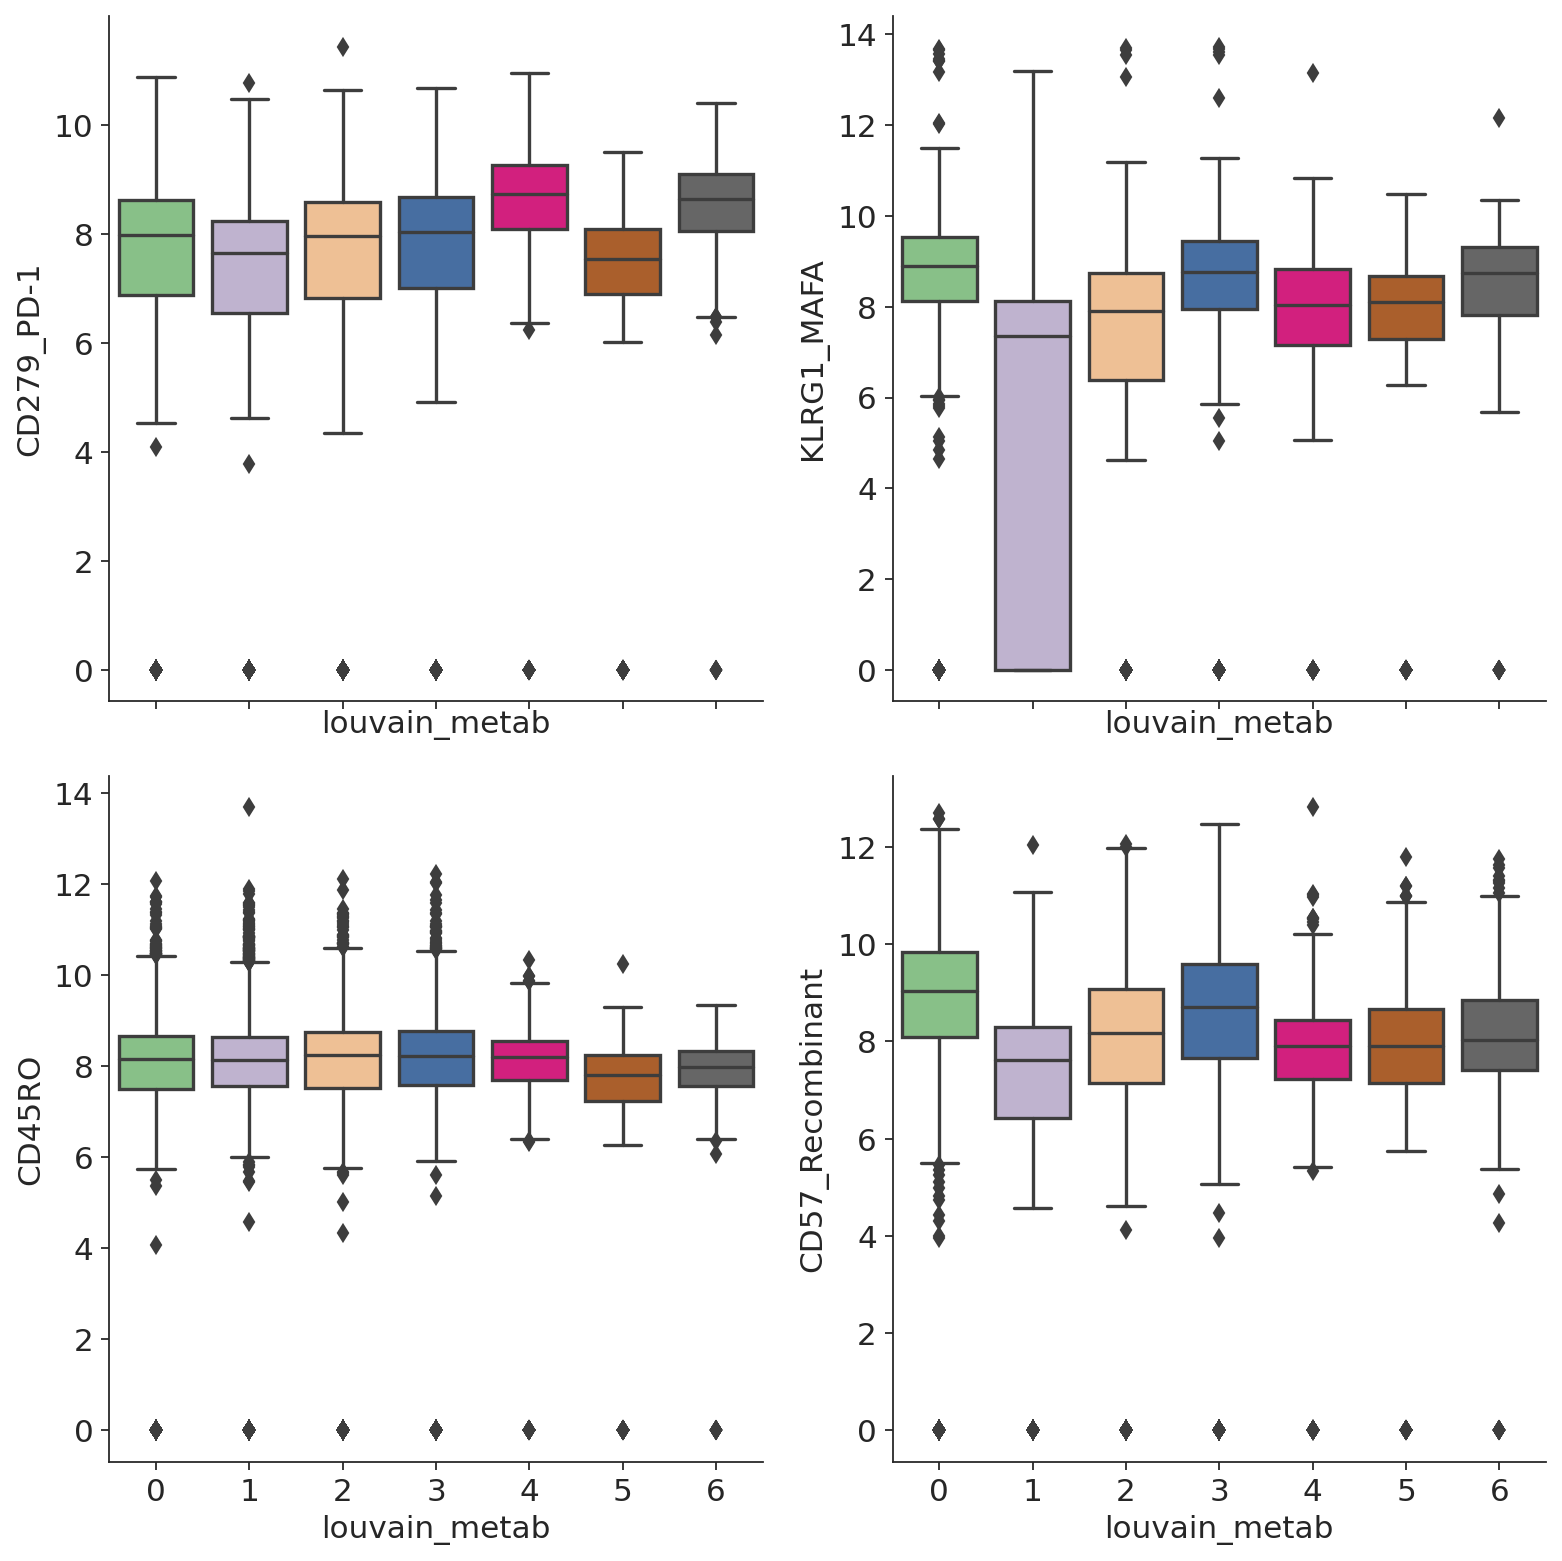

In [13]:
sns.set_style('white')
sns.set_style('ticks')
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=False)
sns.despine()

genes = ['CD279_PD-1', 'KLRG1_MAFA', 'CD45RO', 'CD57_Recombinant']
# Bring protein markers to adata_gex and adata_gex_metab
for marker in genes:
    adata_gex.obs[marker] = adata[:, marker].X.todense()
    adata_gex_metab.obs[marker] = adata[:, marker].X.todense()

k = 0
for i in range(2):
    for j in range(2):
        if k >= len(genes):
            break
        f = sns.boxplot(x=adata_gex.obs['louvain_metab'], y=adata_gex.obs[genes[k]], 
                        ax=axes[i, j], palette=adata_gex_metab.uns['louvain_colors'])
        f.set_ylabel(genes[k])
        #f.set_ylim([0, 0.2])
        k += 1
        #f = plt.errorbar(x=gene_expr_means.index, y=gene_expr_means.iloc[:, i*j],
        #                 xerr=gene_expr_stdev.index, yerr=gene_expr_stdev.iloc[:, i*j], ax=axes[i, j])
f = plt.tight_layout()

In [35]:
adata_gex_metab

AnnData object with n_obs × n_vars = 25966 × 1387
    obs: 'patient', 'ICU_status', 'IL6i_between_draws', 'no_IL6i', 'WHO_scale', 'Blood_draw_time', 'Sex', 'Age_at_baseline', 'Days_since_onset_of_symptoms', 'louvain', 'Days_since_onset_float', 'umap_density_ICU_status', 'CD45RA', 'CD45RO', 'CD197_CCR7', 'CD62L', 'CD95-FAS', 'CD57_Recombinant', 'CD279_PD-1', 'CD45RA/CD45RO', 'louvain_all'
    uns: 'ICU_status_colors', 'louvain', 'louvain_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_ICU_status_params', 'louvain_all_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'